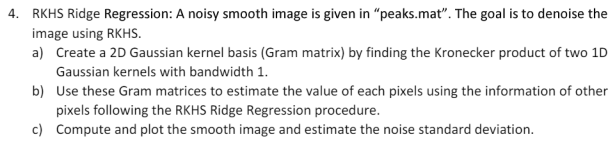

For this question, I will ultimately be using ridge regression to perform RKHS, in which, in this case, an image will be de-noised via Gaussian kerneling and ridge regression. 

While, in the lectures, we were given 1D examples, we will perform this practice on a 2D matrix, or image. 

In [1]:
import scipy.io 
from sklearn.linear_model import Ridge
from scipy.spatial.distance import cdist
import numpy as np 
import matplotlib.pyplot as plt

Below I load the data, and flatten it for use in Ridge Regression

In [2]:
Y = scipy.io.loadmat(r'../peaks.mat')['Y']
Yt = Y.flatten()

Below I plot the original image, Y, and also the values of the flattened, 1D array of Y

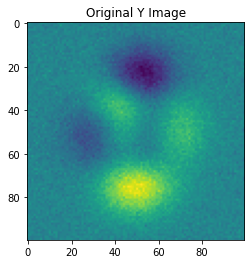

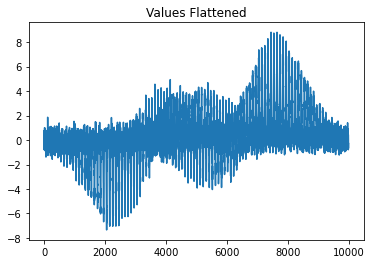

In [3]:
plt.imshow(Y)
plt.title('Original Y Image')
plt.show()
plt.plot(Yt)
plt.title('Values Flattened')
plt.show()

As can be seen in both representations of Y, the data is very noisy. In the image, the noise is very clear visually, and in the flattened plotted values, we can see the noise in the distribution. The original distribution seems to be the combination of 2 merged bi-modal gaussian distributions (can see the peaks on the positive and negative sides), with a lot of noise muddling the true distribution.

Thus, I will start the process of RKHS: 

First, I create X, which serves to fill the gaussian kernel. I then make a 1-D Gaussian kernel, and take the Kronecker product of the kernel with itself to create a 2D Gaussian kernel.

# Part A

In [4]:
X = np.array(range(1,101))
G1D = np.exp(-cdist(X[:,None],X[:,None])**2)
G2D = np.kron(G1D,G1D)

Then, given a value of lambda, the final task is simple: fitting a ridge regression model using the 2D kernel and the original Y values as the dependent variable, and given that regression, re-predicting Yhat given the same kernel. The reason this works is that, with Ridge regression, some of the coefficients are reduced based on predictive value. The higher the lambda, the more coefficients are reduced.

Thus, behind the scenes, I tried various values of Lambda to find a visually-noticeably smoothed image, as instructed in Piazza. 

# Part 2

Original Image:


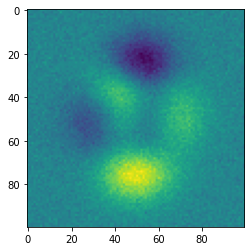

De-Noised Image with Lambda = 5


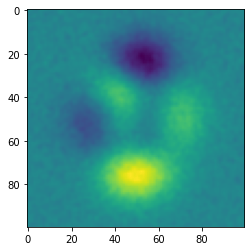

In [5]:
lam = 5
reg = Ridge(alpha = lam)
reg.fit(G2D,Yt)
yhatRBF = reg.predict(G2D)
print("Original Image:")
plt.imshow(Y)
plt.show()
print(f"De-Noised Image with Lambda = {lam}")
plt.imshow(yhatRBF.reshape((100,100)))
plt.show()

As can be seen, the image is visibly more smooth! While still having a blurry noise, it is much smoother than before. Let's look at the flattened values to see how this process changed our flattened representation of the photo cell values:

# Part 3

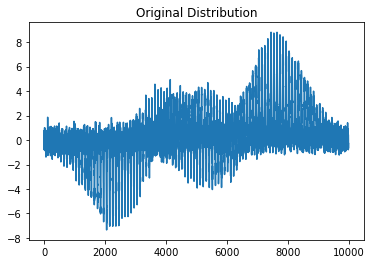

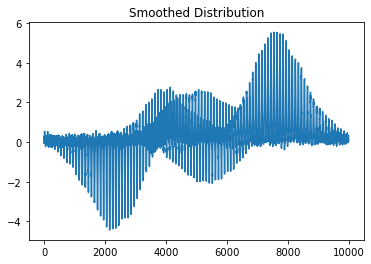

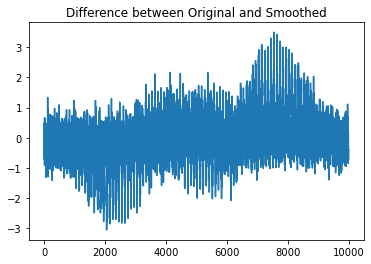

SD of Error: 0.7669756940927642


In [6]:
plt.plot(Yt)
plt.title("Original Distribution")
plt.show()
plt.plot(yhatRBF)
plt.title('Smoothed Distribution')
plt.show()
plt.plot(Yt-yhatRBF)
plt.title('Difference between Original and Smoothed')
plt.show()
print(f"SD of Error: {np.std(Yt-yhatRBF)}")

As can be seen, it is much smoother! Now we can very clearly see the n-modal gaussian distributions truly present in the photo (the blue and yellow 2D blobs). Now that we can more clearly see the values de-noised, we see the true distribution that matches with the 2D photo: a tri-modal gaussian distribution with positive values, and a bi-modal, which tends to be negative values.

I also have the difference in the two (Original Y - de-noised Y), which shows the noise taken out. As can be seen, with a lambda value of 5, perhaps some of the true guassian distributions' data gets taken out, but a lot of messy noise is taken out as well, which is good! In the smoothed distribution, only very little noise seems to be present, especially toward the middle of the two distributions (where coefficients approach 0). 

# Appendix

Just for kicks, I will perform the same process with a much higher lambda: 100, and see the differences:

Original Image:


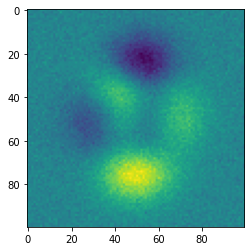

De-Noised Image with Lambda = 100


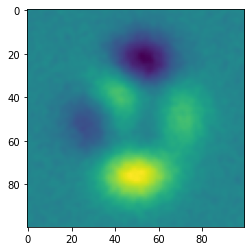

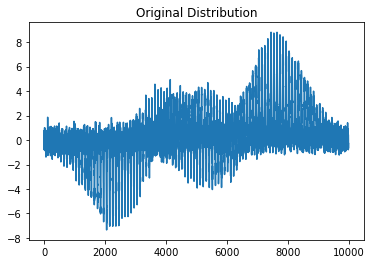

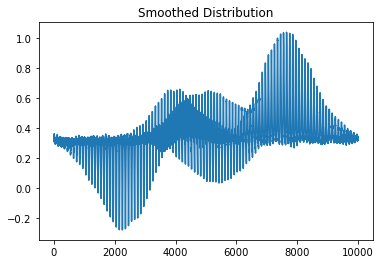

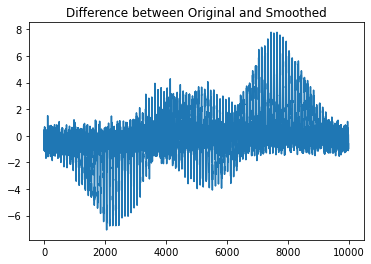

SD of Error: 1.793909626753246


In [7]:
lam = 100
reg = Ridge(alpha = lam)
reg.fit(G2D,Yt)
yhatRBF = reg.predict(G2D)
print("Original Image:")
plt.imshow(Y)
plt.show()
print(f"De-Noised Image with Lambda = {lam}")
plt.imshow(yhatRBF.reshape((100,100)))
plt.show()
plt.plot(Yt)
plt.title("Original Distribution")
plt.show()
plt.plot(yhatRBF)
plt.title('Smoothed Distribution')
plt.show()
plt.plot(Yt-yhatRBF)
plt.title('Difference between Original and Smoothed')
plt.show()
print(f"SD of Error: {np.std(Yt-yhatRBF)}")

As can be seen, the coefficients were reduced much more, and thus the image is now very-smooth, but perhaps at a loss of detail of what should be the original image without noise. The blobs themselves are very blurred now, And we can see in the difference of the original Y and the new predicted Y, that much of the original distribution is "subtracted" out of the new predicted values. 

Thus, depending on the purpose of this process, we could pick the best value of lambda and proceed with analysis. This served primarily as an example to show how different values of lambda affect the final result. 